In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [5]:
record = pd.read_csv("Downloads/camera_results.csv")

In [6]:
camera_sites = pd.read_csv("Downloads/sites_spring.csv")

In [7]:
record.count()

Begin Time      10590
Species Name    10590
Common Name     10590
Actual Lat      10590
Actual Lon      10590
dtype: int64

In [8]:
record_cols = ['Begin_Time','Species_Name','Common_Name','Actual_Lat','Actual_Lon']

In [9]:
record.columns = record_cols

In [10]:
record.columns

Index(['Begin_Time', 'Species_Name', 'Common_Name', 'Actual_Lat',
       'Actual_Lon'],
      dtype='object')

In [11]:
coyo_rec = record[record.Common_Name == "Coyote"].copy()

In [12]:
coyo_rec.head()

,Begin_Time,Species_Name,Common_Name,Actual_Lat,Actual_Lon
2,2019-04-22T05:36:54,Canis latrans,Coyote,47.69558,-122.20347
29,2019-04-20T12:03:27,Canis latrans,Coyote,47.69558,-122.20347
30,2019-04-20T12:04:47,Canis latrans,Coyote,47.69558,-122.20347
52,2019-07-26T15:04:51,Canis latrans,Coyote,47.69558,-122.20347
53,2019-07-26T15:47:18,Canis latrans,Coyote,47.69558,-122.20347


In [14]:
coyo_rec['Begin_Time']=pd.to_datetime(coyo_rec.Begin_Time)

In [15]:
coyo_rec['Hour'] = coyo_rec.Begin_Time.dt.hour

<AxesSubplot:>

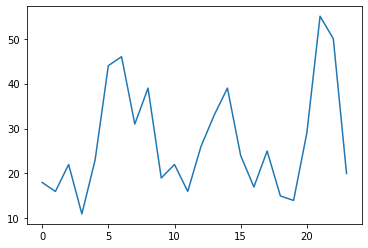

In [16]:
coyo_rec.Hour.value_counts().sort_index().plot()

In [17]:
coyo_rec['Month'] = coyo_rec.Begin_Time.dt.month

<AxesSubplot:>

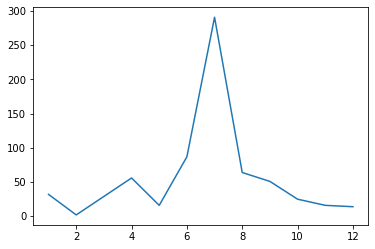

In [18]:
coyo_rec.Month.value_counts().sort_index().plot()

In [19]:
dfObj = pd.DataFrame(coyo_rec, columns = ['Actual_Lat','Actual_Lon'])

In [20]:
duplicateLocation = dfObj[dfObj.duplicated(['Actual_Lat','Actual_Lon'])]

In [21]:
print(duplicateLocation.head())

    Actual_Lat  Actual_Lon
29    47.69558  -122.20347
30    47.69558  -122.20347
52    47.69558  -122.20347
53    47.69558  -122.20347
60    47.69558  -122.20347


In [22]:
duplicateLocation.duplicated().sum()

614

In [23]:
rec_location = pd.DataFrame(record,columns=['Actual_Lat','Actual_Lon'])

In [63]:
cam_location = pd.DataFrame(camera_sites, columns=['Actual_Lat','Actual_Lon'])

In [87]:
rec_location.Actual_Lat.nunique()

46

In [65]:
cam_location.Actual_Lat.nunique()

24

In [66]:
cam_location.dropna(subset = ['Actual_Lat','Actual_Lon'],inplace=True)

In [69]:
geo_rec_location = gpd.GeoDataFrame(rec_location,geometry=gpd.points_from_xy(rec_location.Actual_Lat,rec_location.Actual_Lon))

In [70]:
geo_cam_location = gpd.GeoDataFrame(cam_location, geometry=gpd.points_from_xy(cam_location.Actual_Lat,cam_location.Actual_Lon))

In [98]:
g1 = geo_rec_location.drop_duplicates()

In [99]:
g2 = geo_cam_location.drop_duplicates()

In [106]:
g1.merge(g2,indicator=True)

,Actual_Lat,Actual_Lon,geometry,_merge
0,47.48434,-122.26262,POINT (47.484 -122.263),both
1,47.70676,-122.19162,POINT (47.707 -122.192),both
2,47.75108,-122.00757,POINT (47.751 -122.008),both
3,47.67356,-122.31107,POINT (47.674 -122.311),both
4,47.68166,-122.25092,POINT (47.682 -122.251),both
5,47.65980,-122.41942,POINT (47.660 -122.419),both
6,47.69055,-122.28101,POINT (47.691 -122.281),both
7,47.74577,-121.96749,POINT (47.746 -121.967),both
8,47.65464,-122.39044,POINT (47.655 -122.390),both
9,47.67200,-122.35900,POINT (47.672 -122.359),both


In [112]:
g3 = pd.concat([g1,g2]).drop_duplicates()

In [118]:
g3

,Actual_Lat,Actual_Lon,geometry
0,47.695580,-122.203470,POINT (47.696 -122.203)
9,47.420010,-122.041840,POINT (47.420 -122.042)
12,47.422790,-121.950020,POINT (47.423 -121.950)
20,47.484340,-122.262620,POINT (47.484 -122.263)
63,47.711600,-122.043490,POINT (47.712 -122.043)
87,47.704620,-122.088870,POINT (47.705 -122.089)
91,47.740430,-122.017350,POINT (47.740 -122.017)
92,47.706760,-122.191620,POINT (47.707 -122.192)
139,47.560930,-122.318490,POINT (47.561 -122.318)
187,47.679660,-122.317090,POINT (47.680 -122.317)


In [113]:
g1.merge(g3,indicator=True)

,Actual_Lat,Actual_Lon,geometry,_merge
0,47.69558,-122.20347,POINT (47.696 -122.203),both
1,47.42001,-122.04184,POINT (47.420 -122.042),both
2,47.42279,-121.95002,POINT (47.423 -121.950),both
3,47.48434,-122.26262,POINT (47.484 -122.263),both
4,47.71160,-122.04349,POINT (47.712 -122.043),both
5,47.70462,-122.08887,POINT (47.705 -122.089),both
6,47.74043,-122.01735,POINT (47.740 -122.017),both
7,47.70676,-122.19162,POINT (47.707 -122.192),both
8,47.56093,-122.31849,POINT (47.561 -122.318),both
9,47.67966,-122.31709,POINT (47.680 -122.317),both


In [114]:
g2.merge(g3,indicator=True)

,Actual_Lat,Actual_Lon,geometry,_merge
0,47.666160,-122.283270,POINT (47.666 -122.283),both
1,47.643540,-122.360460,POINT (47.644 -122.360),both
2,47.659800,-122.419420,POINT (47.660 -122.419),both
3,47.745770,-121.967490,POINT (47.746 -121.967),both
4,47.484340,-122.262620,POINT (47.484 -122.263),both
5,47.751080,-122.007570,POINT (47.751 -122.008),both
6,47.706760,-122.191620,POINT (47.707 -122.192),both
7,47.690550,-122.281010,POINT (47.691 -122.281),both
8,47.696086,-122.201985,POINT (47.696 -122.202),both
9,47.654640,-122.390440,POINT (47.655 -122.390),both


In [123]:
g4 = g1[~(g1['geometry'].isin(g2['geometry']))].reset_index(drop=True) 
#g1:camera_results locations
#g2:sites_spring locations
#the locations below are the differences between two dataframes

In [126]:
print(g4)

    Actual_Lat  Actual_Lon                 geometry
0     47.69558  -122.20347  POINT (47.696 -122.203)
1     47.42001  -122.04184  POINT (47.420 -122.042)
2     47.42279  -121.95002  POINT (47.423 -121.950)
3     47.71160  -122.04349  POINT (47.712 -122.043)
4     47.70462  -122.08887  POINT (47.705 -122.089)
5     47.74043  -122.01735  POINT (47.740 -122.017)
6     47.56093  -122.31849  POINT (47.561 -122.318)
7     47.67966  -122.31709  POINT (47.680 -122.317)
8     47.71024  -122.10423  POINT (47.710 -122.104)
9     47.74040  -122.01777  POINT (47.740 -122.018)
10    47.68709  -122.17332  POINT (47.687 -122.173)
11    47.64354  -122.36030  POINT (47.644 -122.360)
12    47.66681  -122.28342  POINT (47.667 -122.283)
13    47.75103  -122.00792  POINT (47.751 -122.008)
14    47.70461  -122.08888  POINT (47.705 -122.089)
15    47.46189  -122.17861  POINT (47.462 -122.179)
16    47.74055  -122.01765  POINT (47.741 -122.018)
17    47.56073  -122.31937  POINT (47.561 -122.319)
18    47.449

In [32]:
record_with_location = pd.merge(coyo_rec,camera_sites)

In [33]:
record_with_location

,Begin_Time,Species_Name,Common_Name,Actual_Lat,Actual_Lon,Hour,Month,Location
0,2019-06-09 08:13:34,Canis latrans,Coyote,47.70676,-122.19162,8,6,Heronfield Wetlands
1,2019-06-09 08:17:43,Canis latrans,Coyote,47.70676,-122.19162,8,6,Heronfield Wetlands
2,2019-06-09 21:58:47,Canis latrans,Coyote,47.70676,-122.19162,21,6,Heronfield Wetlands
3,2019-06-11 08:08:02,Canis latrans,Coyote,47.70676,-122.19162,8,6,Heronfield Wetlands
4,2019-06-11 08:10:55,Canis latrans,Coyote,47.70676,-122.19162,8,6,Heronfield Wetlands
...,...,...,...,...,...,...,...,...
444,2019-10-06 14:18:57,Canis latrans,Coyote,47.70668,-122.15120,14,10,Sammamish Valley Park
445,2019-10-06 14:22:04,Canis latrans,Coyote,47.70668,-122.15120,14,10,Sammamish Valley Park
446,2020-01-14 20:14:32,Canis latrans,Coyote,47.70668,-122.15120,20,1,Sammamish Valley Park
447,2019-05-15 04:52:26,Canis latrans,Coyote,47.67200,-122.35900,4,5,Phinney neighborhood P-Patch


<AxesSubplot:>

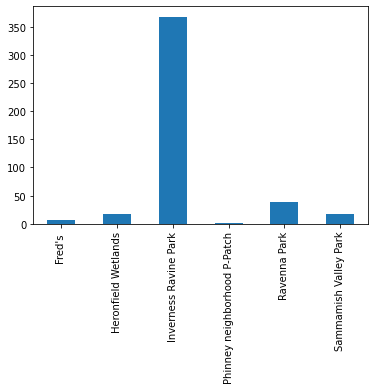

In [34]:
record_with_location.Location.value_counts().sort_index().plot(kind='bar')
#camera locations and number of report of each location